***Importing Libraries***

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

***Importing Data***

In [2]:
data=pd.read_csv('H:/DATA_ANALYTICS/Projects/Superstore(Python+Tableau)-I/DATA/Superstore.csv',encoding='ISO-8859-1')
df=pd.DataFrame(data)

***Inspecting and Cleaning Data***

In [3]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-16,11-11-16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11-08-16,11-11-16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,06-12-16,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [4]:
df.drop(['Customer Name','Postal Code'],axis=1,inplace = True)
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-16,11-11-16,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11-08-16,11-11-16,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,06-12-16,6/16/2016,Second Class,DV-13045,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Ship Date     9994 non-null   object 
 4   Ship Mode     9994 non-null   object 
 5   Customer ID   9994 non-null   object 
 6   Segment       9994 non-null   object 
 7   Country       9994 non-null   object 
 8   City          9994 non-null   object 
 9   State         9994 non-null   object 
 10  Region        9994 non-null   object 
 11  Product ID    9994 non-null   object 
 12  Category      9994 non-null   object 
 13  Sub-Category  9994 non-null   object 
 14  Product Name  9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

In [6]:
df['Order Date']=pd.to_datetime(df['Order Date'],errors= 'coerce').dt.date
df['Ship Date']=pd.to_datetime(df['Ship Date'],errors= 'coerce').dt.date
df.head(3)

C:\Users\intel 2018\AppData\Local\Temp\ipykernel_10212\459929911.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date']=pd.to_datetime(df['Order Date'],errors= 'coerce').dt.date
C:\Users\intel 2018\AppData\Local\Temp\ipykernel_10212\459929911.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Ship Date']=pd.to_datetime(df['Ship Date'],errors= 'coerce').dt.date


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


***EDA***

In [7]:
df['Profit_Margin%']=df['Profit']/df['Sales']*100

In [8]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit_Margin%
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,16.0
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,30.0
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714,47.0


In [9]:
df.drop(['Row ID'],axis=1,inplace=True)
gb= df.groupby(['Category','Sub-Category'])['Profit_Margin%'].mean().round(2).reset_index()
print(gb.sort_values(['Profit_Margin%'],ascending=True))

           Category Sub-Category  Profit_Margin%
6   Office Supplies      Binders          -19.96
4   Office Supplies   Appliances          -15.69
3         Furniture       Tables          -14.77
0         Furniture    Bookcases          -12.66
15       Technology     Machines           -7.20
1         Furniture       Chairs            4.39
11  Office Supplies      Storage            8.91
12  Office Supplies     Supplies           11.20
16       Technology       Phones           11.92
2         Furniture  Furnishings           13.71
13       Technology  Accessories           21.82
5   Office Supplies          Art           25.16
8   Office Supplies    Fasteners           29.92
14       Technology      Copiers           31.72
7   Office Supplies    Envelopes           42.31
10  Office Supplies        Paper           42.56
9   Office Supplies       Labels           42.97


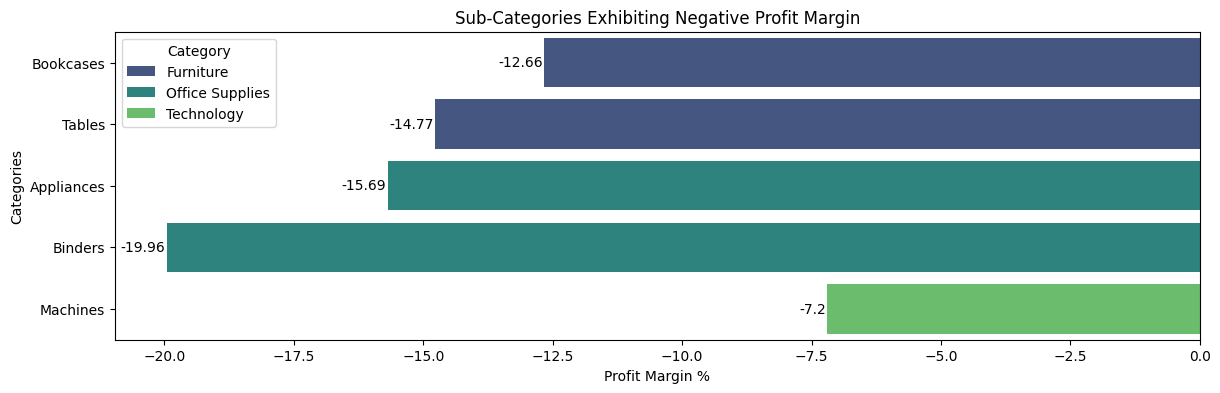

In [66]:
loss=gb[gb['Profit_Margin%']<0]
plt.figure(figsize=(14,4))
plt.title("Sub-Categories Exhibiting Negative Profit Margin")
ax=sns.barplot(data=loss,x='Profit_Margin%',y='Sub-Category',hue='Category',palette='viridis',orient='horizontal')
ax.bar_label(ax.containers[0],padding=1)
ax.bar_label(ax.containers[1],padding=1)
ax.bar_label(ax.containers[2],padding=1)
plt.ylabel('Categories')
plt.xlabel('Profit Margin %')
plt.savefig('plot1.png', dpi=300, bbox_inches='tight')
plt.show()

In [11]:
negative_profit=df[df['Profit_Margin%']<0]
worst_prods=negative_profit.sort_values(by='Profit_Margin%').head(10)
worst_prods=worst_prods[['Product Name', 'Sub-Category', 'Category']]
print(worst_prods)

                                           Product Name Sub-Category  \
8766    Kensington 6 Outlet SmartSocket Surge Protector   Appliances   
9164     Hoover Shoulder Vac Commercial Portable Vacuum   Appliances   
261   Eureka Disposable Bags for Sanitaire Vibra Gro...   Appliances   
676                   Hoover Portapower Portable Vacuum   Appliances   
5414                   Euro Pro Shark Stick Mini Vacuum   Appliances   
7494  Commercial WindTunnel Clean Air Upright Vacuum...   Appliances   
5755  Hoover Replacement Belts For Soft Guard & Comm...   Appliances   
8246     Tripp Lite Isotel 8 Ultra 8 Outlet Metal Surge   Appliances   
4980               Belkin 6 Outlet Metallic Surge Strip   Appliances   
8916                   Euro Pro Shark Stick Mini Vacuum   Appliances   

             Category  
8766  Office Supplies  
9164  Office Supplies  
261   Office Supplies  
676   Office Supplies  
5414  Office Supplies  
7494  Office Supplies  
5755  Office Supplies  
8246  Office Su

In [12]:
df.drop(['Country'],axis=1,inplace=True)

In [14]:
df.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit_Margin%
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,16.0
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,30.0
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714,47.0


In [22]:
df['Discount'].corr(df['Profit_Margin%']) #Negative relation shows that if discount increases then profit margin dereases.

np.float64(-0.8644522856000381)

In [34]:
df['Discount']=df['Discount']*100

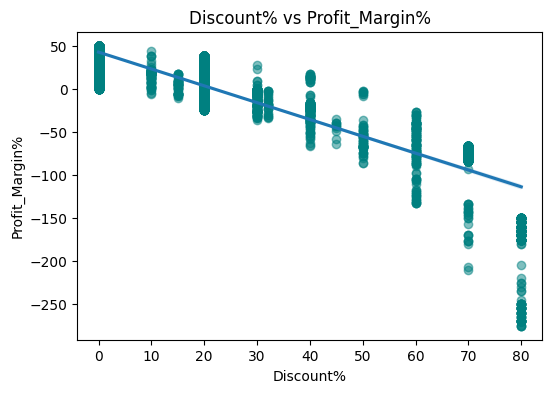

In [67]:
plt.figure(figsize=(6,4))
sns.regplot(data=df,x='Discount',y='Profit_Margin%',scatter_kws={'alpha':0.5,'color':'teal'})
plt.xlabel('Discount%')
plt.ylabel('Profit_Margin%')
plt.title('Discount% vs Profit_Margin%')
plt.savefig('plot2.png', dpi=300, bbox_inches='tight')
plt.show()

In [56]:
gp1=df.groupby('Ship Mode')['Profit_Margin%'].sum().reset_index()
print(gp1)

        Ship Mode  Profit_Margin%
0     First Class    17832.773109
1        Same Day     7501.618114
2    Second Class    29215.608268
3  Standard Class    65691.741873


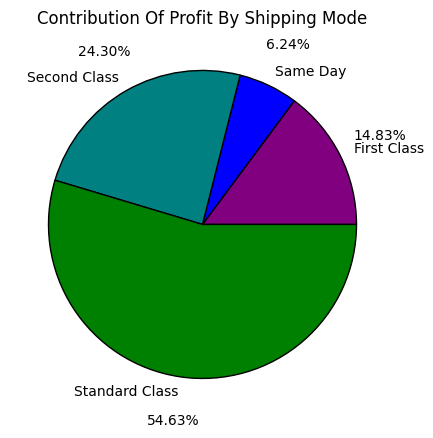

In [68]:
plt.figure(figsize=(5,5))
plt.pie(gp1['Profit_Margin%'], labels=gp1['Ship Mode'],autopct='%1.2f%%',colors=['purple','blue','teal','green'],pctdistance=1.29,wedgeprops={'edgecolor':'black', 'linewidth':1.0})
plt.title('Contribution Of Profit By Shipping Mode')
plt.savefig('plot3.png', dpi=300, bbox_inches='tight')
plt.show()

***Exporting the Cleaned Data***

In [70]:
df.to_csv('Superstore_cleaned.csv', index=False)